<a href="https://colab.research.google.com/github/arunt-sjsu/deep_learning/blob/main/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastai2
!pip install utils
!pip install fastcore==0.1.34
!pip install torch==1.6.0 torchvision==0.7.0

  Using cached https://files.pythonhosted.org/packages/57/db/7f09e6f34461f17ae096964dd3481a09f06869655444626b72cb54a89565/fastcore-0.1.34-py3-none-any.whl
ERROR: nbdev 1.1.12 has requirement fastcore>=1.3.19, but you'll have fastcore 0.1.34 which is incompatible.
  Found existing installation: fastcore 1.3.19
    Uninstalling fastcore-1.3.19:
      Successfully uninstalled fastcore-1.3.19


In [1]:
from utils import *
from fastai2.vision.all import *

In [6]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
#learn.fine_tune(1)


In [8]:
img = PILImage.create('images/cat2.jpg')
img.to_thumb(192)
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}; Probability it's a cat: {probs[1].item():.6f}")

img = PILImage.create('images/cat3.jpg')
img.to_thumb(192)
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}; Probability it's a cat: {probs[1].item():.6f}")

img = PILImage.create('images/dog_example.jpg')
img.to_thumb(192)
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}; Probability it's a cat: {probs[1].item():.6f}")


Is this a cat?: False; Probability it's a cat: 0.001339


Is this a cat?: False; Probability it's a cat: 0.112876


Is this a cat?: False; Probability it's a cat: 0.049586


In [12]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
#learn.fine_tune(8)


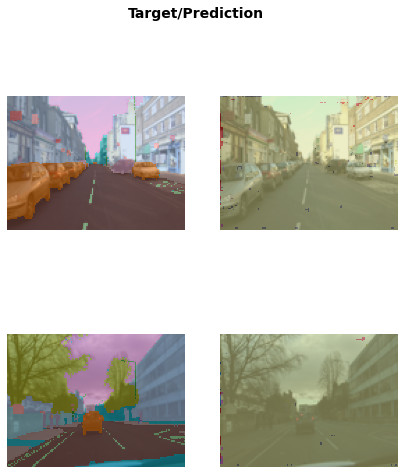

In [13]:
learn.show_results(max_n=6, figsize=(7,8))


In [15]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
#learn.fine_tune(4, 1e-2)


In [16]:
learn.predict("I really liked that movie!")


('pos', tensor(1), tensor([0.4993, 0.5007]))

In [3]:
from fastai2.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)


In [4]:
learn.fit_one_cycle(3)


epoch,train_loss,valid_loss,accuracy,time
0,0.361105,0.364635,0.829085,00:07
1,0.352831,0.352318,0.836302,00:07
2,0.351086,0.351317,0.834306,00:07


In [5]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))


In [6]:
learn.show_results()


,userId,movieId,rating,rating_pred
0,77.0,23.0,3.0,2.973486
1,38.0,38.0,4.5,3.017871
2,41.0,75.0,4.0,2.997217
3,67.0,68.0,3.0,2.980865
4,3.0,8.0,3.0,3.006939
5,86.0,89.0,4.0,2.999162
6,70.0,58.0,4.0,2.983008
7,81.0,50.0,4.0,2.969640
8,15.0,2.0,3.5,2.999548


In [7]:
learn.fine_tune(10)
learn.show_results()

epoch,train_loss,valid_loss,time
0,1.527333,1.387781,00:00


epoch,train_loss,valid_loss,time
0,1.361481,1.326431,00:00
1,1.250052,1.143720,00:00
2,1.005586,0.851880,00:00
3,0.781807,0.730758,00:00
4,0.687874,0.701869,00:00
5,0.641515,0.695546,00:00
6,0.625842,0.691068,00:00
7,0.603778,0.689303,00:00
8,0.600559,0.688526,00:00
9,0.595874,0.688487,00:00


,userId,movieId,rating,rating_pred
0,46.0,47.0,3.5,3.107030
1,19.0,34.0,3.0,3.776083
2,66.0,86.0,5.0,4.153523
3,86.0,52.0,4.0,3.806887
4,3.0,48.0,4.0,3.813155
5,44.0,1.0,4.0,3.954116
6,37.0,47.0,4.0,4.673674
7,26.0,8.0,4.5,3.996969
8,38.0,5.0,4.5,3.779243
